In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
school_data_1 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part1.csv")

In [3]:
school_data_2 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part2.csv")

In [4]:
school_data_3 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part3.csv")

In [5]:
school_data_4 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part4.csv")

In [6]:
school_data_5 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part5.csv")

In [7]:
school_data_6 = pd.read_csv("https://raw.githubusercontent.com/jamilditter/washington_education/refs/heads/main/data/Washington_School_Demographic_and_Testing_Data_part6.csv")

In [8]:
school_data = pd.concat([school_data_1, school_data_2, school_data_3, school_data_4, school_data_5, school_data_6])

In [10]:
school_data.info()

<class 'pandas.DataFrame'>
Index: 336522 entries, 0 to 56086
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   schoolyear                                                      336522 non-null  str    
 1   organizationlevel                                               336522 non-null  str    
 2   county                                                          336522 non-null  str    
 3   esdname                                                         335433 non-null  str    
 4   esdorganizationid                                               335433 non-null  float64
 5   districtcode                                                    336522 non-null  int64  
 6   districtname                                                    336522 non-null  str    
 7   districtorganizationid                                 

In [11]:
school_data.head()

,schoolyear,organizationlevel,county,esdname,esdorganizationid,districtcode,districtname,districtorganizationid,schoolname,schoolorganizationid_x,...,migrant,non_migrant,military_parent,non_military_parent,mobile,non_mobile,section_504,non_section_504,students_with_disabilities,students_without_disabilities
0,2021-22,District,Thurston,Capital Region ESD 113,100004.0,34002,Yelm School District,100304,District Total,NaN,...,40.0,5402.0,689.0,4753.0,312.0,5130.0,251.0,5191.0,868.0,4574.0
1,2015-16,District,Thurston,Capital Region ESD 113,100004.0,34002,Yelm School District,100304,District Total,NaN,...,21.0,5690.0,0.0,5711.0,284.0,5427.0,216.0,5495.0,776.0,4935.0
2,2015-16,District,Ferry,Educational Service District 101,100001.0,10309,Republic School District,100217,District Total,NaN,...,0.0,353.0,0.0,353.0,14.0,339.0,15.0,338.0,46.0,307.0
3,2014-15,District,Ferry,Educational Service District 101,100001.0,10309,Republic School District,100217,District Total,NaN,...,0.0,329.0,0.0,329.0,12.0,317.0,19.0,310.0,44.0,285.0
4,2014-15,District,Ferry,Educational Service District 101,100001.0,10309,Republic School District,100217,District Total,NaN,...,0.0,329.0,0.0,329.0,12.0,317.0,19.0,310.0,44.0,285.0


In [10]:
school_data = school_data.dropna(axis=1, how='all')

In [11]:
columns_to_drop = [ 
    'male',
    'non_low_income',
    'non_migrant',
    'non_mobile',
    'non_section_504',
    'non_military_parent',
    'non_fostercare',
    'non_highly_capable',
    'non_homeless',
    'non_english_language_learners',
    'students_without_disabilities'
]

school_data = school_data.drop(columns=columns_to_drop) #dropping the above columns since they belong to pairs
#will reduce multicollinearity 

In [12]:
numeric_school_data = school_data.select_dtypes(include=[np.float64])

In [13]:
correlation_matrix = numeric_school_data.corr()

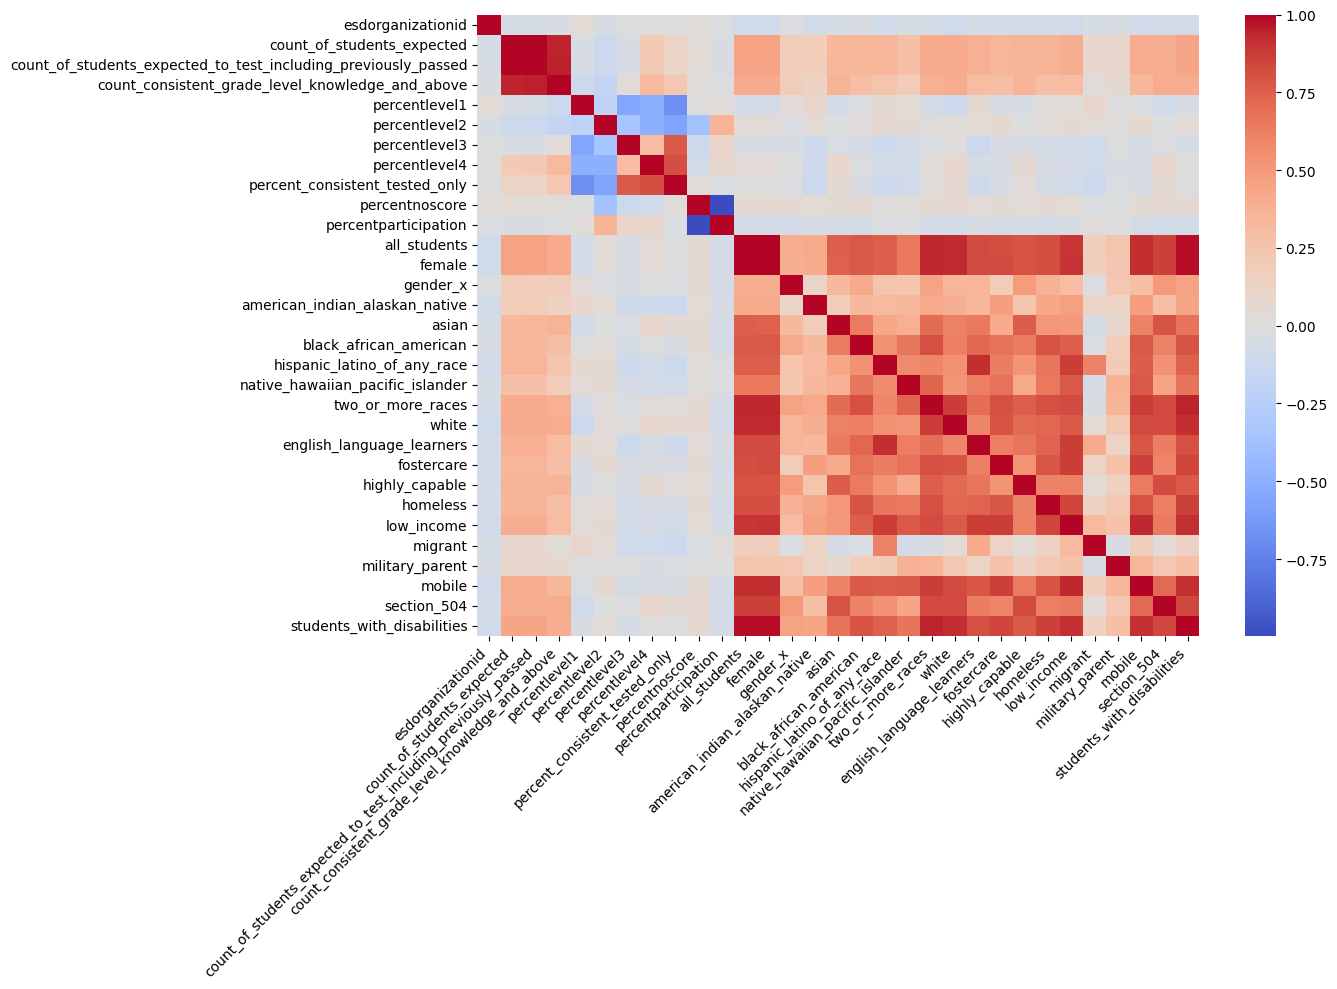

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

plt.xticks(rotation=45, ha='right')   # right-align rotated labels
plt.yticks(rotation=0)

plt.tight_layout()                    # auto-fix spacing
plt.show()

In [15]:
school_data['districtname'].nunique()

325

In [16]:
school_data['schoolyear'].unique()

array(['2021-22', '2015-16', '2014-15', '2020-21', '2018-19', '2017-18',
       '2016-17', '2022-23', '2023-24', '2024-25'], dtype=object)

In [17]:
school_data['organizationlevel'].unique()

array(['District'], dtype=object)

In [18]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336522 entries, 0 to 56086
Data columns (total 47 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   schoolyear                                                      336522 non-null  object 
 1   organizationlevel                                               336522 non-null  object 
 2   county                                                          336522 non-null  object 
 3   esdname                                                         335433 non-null  object 
 4   esdorganizationid                                               335433 non-null  float64
 5   districtcode                                                    336522 non-null  int64  
 6   districtname                                                    336522 non-null  object 
 7   districtorganizationid                      

In [19]:
school_data['testsubject'].unique()

array(['Math', 'Science', 'Biology', 'ELA', 'ELPA', 'WIDA', 'WIDAACC'],
      dtype=object)

In [24]:
school_data['testsubject'].value_counts()

testsubject
ELA        101564
Math       101553
Science     90978
ELPA        22246
Biology     15406
WIDA         4542
WIDAACC       233
Name: count, dtype: int64

Below I've reinstated the original data with all columns for EDA.

In [25]:
school_data_original = pd.concat([school_data_1, school_data_2, school_data_3, school_data_4, school_data_5, school_data_6])

In [36]:
school_data_original = school_data_original.dropna(axis=1, how='all')

school_data_original.info()

In [40]:
school_data_original['studentgroup'].unique()

array(['Homeless', 'Non-Homeless', 'Section 504', 'TwoorMoreRaces',
       'American Indian/ Alaskan Native', 'Asian',
       'Black/ African American', 'English Language Learners',
       'Low-Income', 'Male', 'All Students', 'Non-Low Income',
       'Non-English Language Learners', 'Foster Care', 'Female',
       'Gender X', 'Migrant', 'Non Migrant',
       'Native Hawaiian/ Other Pacific Islander', 'White',
       'Hispanic/ Latino of any race(s)', 'Non-Foster Care',
       'Non Military Parent', 'Unknown', 'Students with Disabilities',
       'Non Section 504', 'Military Parent',
       'Students without Disabilities', 'Two Or More Races',
       'Native Hawaiian/Pacific Islander'], dtype=object)

In [41]:
school_data1 = school_data_original[
    school_data_original['studentgroup'] == 'All Students'
].copy()

In [43]:
school_data1['percent_consistent_grade_level_knowledge_and_above'] = pd.to_numeric(
    school_data1['percent_consistent_grade_level_knowledge_and_above'],
    errors='coerce'
)

I'll come back to filtering the data for district averages later. For now I'll just work on EDA with the original data:

# Exploratory Data Analysis

Convert certain columns to hold numeric values:

In [51]:
school_data_original['percent_consistent_grade_level_knowledge_and_above'].head()

0    Suppressed: N<10
1                <10%
2               40.0%
3    Suppressed: N<10
4    Suppressed: N<10
Name: percent_consistent_grade_level_knowledge_and_above, dtype: object

In [52]:
#we'll try this for now and see if it's worth it
def clean_pct(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    # handle suppressed values
    if 'Suppressed' in x:
        return np.nan
    # handle <10% style
    if '<' in x:
        x = x.replace('<','')
    # remove percent sign
    x = x.replace('%','')
    try:
        return float(x)
    except:
        return np.nan

school_data_original['pct_score'] = school_data_original['percent_consistent_grade_level_knowledge_and_above'].apply(clean_pct)

Checking for unique values of the following categorical columns:

In [54]:
school_data_original['schoolyear'].unique()

array(['2021-22', '2015-16', '2014-15', '2020-21', '2018-19', '2017-18',
       '2016-17', '2022-23', '2023-24', '2024-25'], dtype=object)

In [55]:
school_data_original['testsubject'].unique()

array(['Math', 'Science', 'Biology', 'ELA', 'ELPA', 'WIDA', 'WIDAACC'],
      dtype=object)

In [56]:
school_data_original['gradelevel'].unique()

array(['All Grades'], dtype=object)

In [57]:
school_data_original['studentgroup'].unique()

array(['Homeless', 'Non-Homeless', 'Section 504', 'TwoorMoreRaces',
       'American Indian/ Alaskan Native', 'Asian',
       'Black/ African American', 'English Language Learners',
       'Low-Income', 'Male', 'All Students', 'Non-Low Income',
       'Non-English Language Learners', 'Foster Care', 'Female',
       'Gender X', 'Migrant', 'Non Migrant',
       'Native Hawaiian/ Other Pacific Islander', 'White',
       'Hispanic/ Latino of any race(s)', 'Non-Foster Care',
       'Non Military Parent', 'Unknown', 'Students with Disabilities',
       'Non Section 504', 'Military Parent',
       'Students without Disabilities', 'Two Or More Races',
       'Native Hawaiian/Pacific Islander'], dtype=object)

In [77]:
numeric_cols = [
    'pct_score', 'low_income', 'english_language_learners', 'students_with_disabilities',
    'homeless', 'all_students', 'percentlevel1', 'percentlevel2', 'percentlevel3', 'percentlevel4'
]

# Basic descriptive statistics
descriptive_stats = school_data_original[numeric_cols].describe().T
descriptive_stats['missing_values'] = school_data_original[numeric_cols].isna().sum()
descriptive_stats['missing_percent'] = descriptive_stats['missing_values'] / len(school_data_original) * 100

descriptive_stats

,count,mean,std,min,25%,50%,75%,max,missing_values,missing_percent
pct_score,218436.0,40.876811,20.439530,0.9,24.700000,40.900000,55.800000,97.900000,118086,35.090128
low_income,336327.0,2401.273261,3678.931429,0.0,296.000000,926.000000,2648.000000,21633.000000,195,0.057946
english_language_learners,336327.0,622.951818,1225.203139,0.0,17.000000,139.000000,490.000000,7916.000000,195,0.057946
students_with_disabilities,336327.0,739.971471,1106.767285,0.0,89.000000,300.000000,879.000000,9294.000000,195,0.057946
homeless,336327.0,144.937472,278.162083,0.0,12.000000,50.000000,159.000000,3261.000000,195,0.057946
all_students,336327.0,5029.421661,7487.554074,0.0,595.000000,1908.000000,5750.000000,55325.000000,195,0.057946
percentlevel1,203992.0,0.244887,0.158987,0.0,0.121212,0.218892,0.338624,0.916667,132530,39.382269
percentlevel2,203992.0,0.281336,0.148059,0.0,0.200000,0.250000,0.308725,0.935897,132530,39.382269
percentlevel3,203992.0,0.266719,0.113458,0.0,0.187500,0.264706,0.336530,0.882353,132530,39.382269
percentlevel4,203992.0,0.155341,0.123765,0.0,0.060606,0.136364,0.224138,0.875000,132530,39.382269


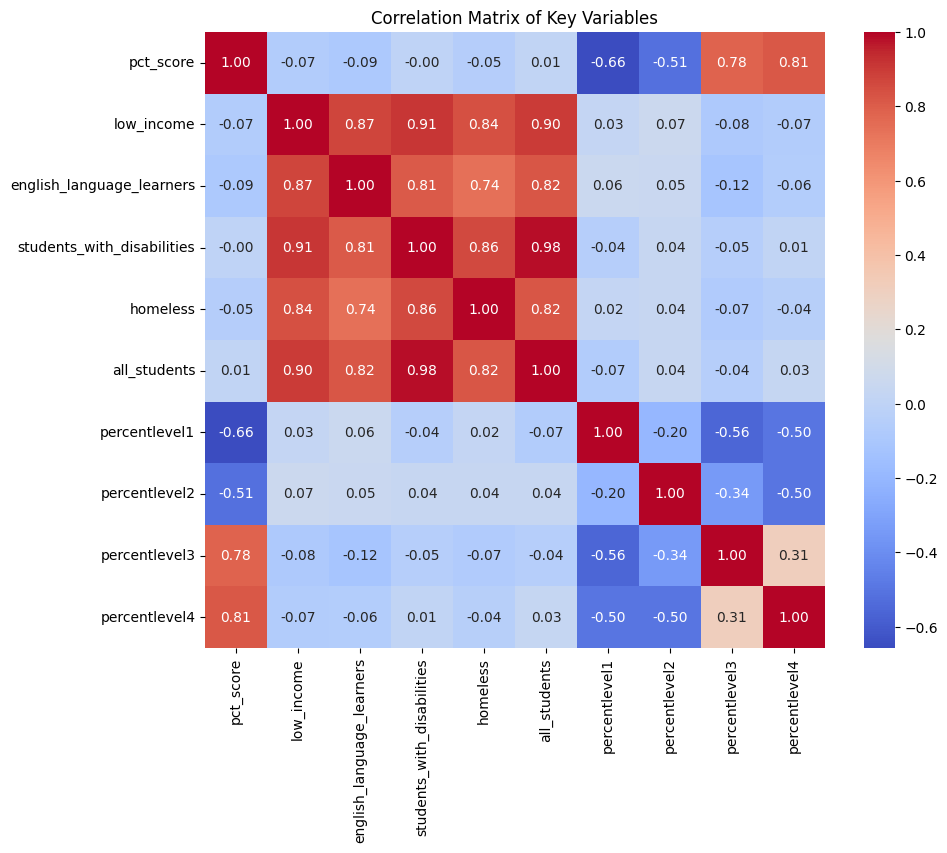

In [76]:
# Correlation matrix for numeric columns
correlation_matrix = school_data_original[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

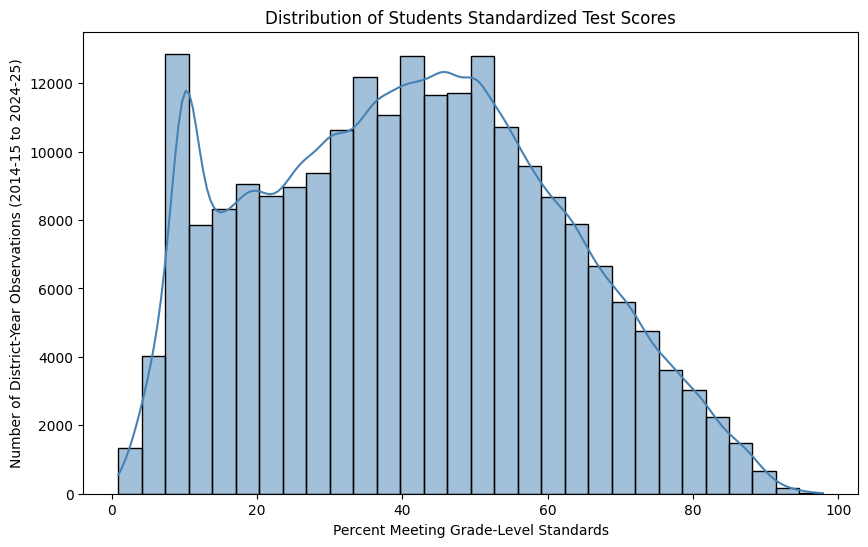

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(school_data_original['pct_score'].dropna(), bins=30, kde=True, color='steelblue')
plt.xlabel('Percent Meeting Grade-Level Standards')
plt.ylabel('Number of District-Year Observations (2014-15 to 2024-25)')
plt.title('Distribution of Students Standardized Test Scores')
plt.show()

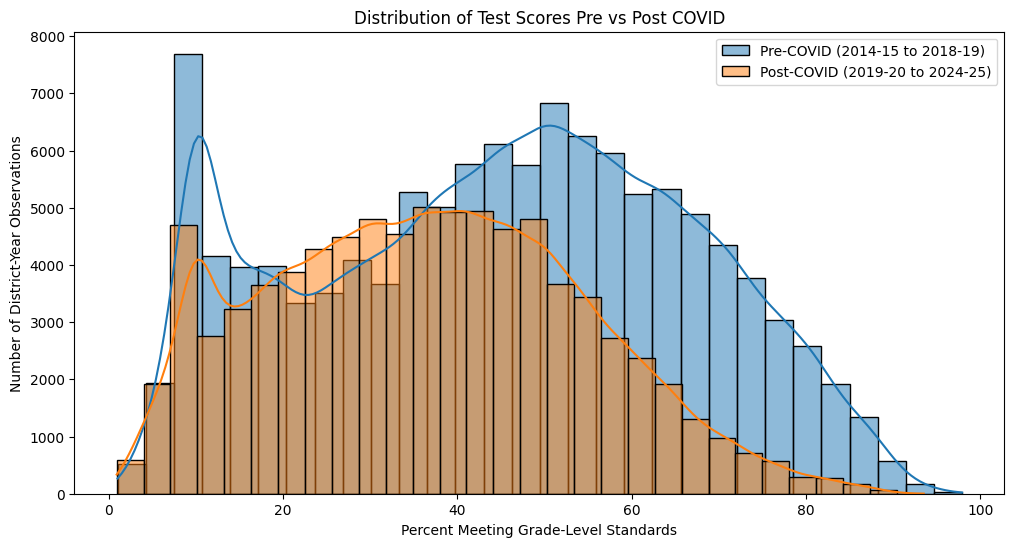

In [68]:
pre_covid = school_data_original[school_data_original['schoolyear'].isin(['2014-15','2015-16','2016-17','2017-18','2018-19'])]
post_covid = school_data_original[school_data_original['schoolyear'].isin(['2019-20','2020-21','2021-22','2022-23', '2023-24', '2024-2025'])]

plt.figure(figsize=(12,6))
sns.histplot(pre_covid['pct_score'].dropna(), bins=30, label='Pre-COVID (2014-15 to 2018-19)', kde=True, alpha=0.5)
sns.histplot(post_covid['pct_score'].dropna(), bins=30, label='Post-COVID (2019-20 to 2024-25)', kde=True, alpha=0.5)
plt.xlabel('Percent Meeting Grade-Level Standards')
plt.ylabel('Number of District-Year Observations')
plt.title('Distribution of Test Scores Pre vs Post COVID')
plt.legend()
plt.show()

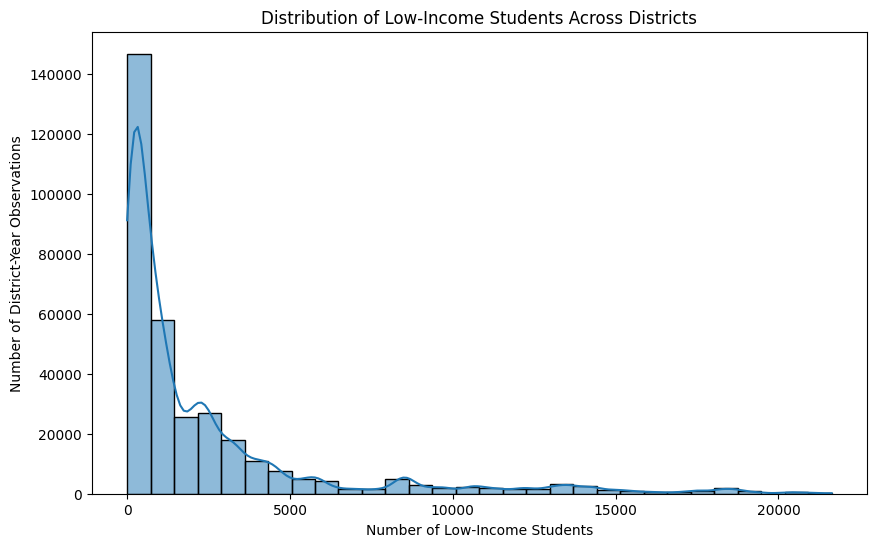

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(school_data_original['low_income'].dropna(), bins=30, kde=True)
plt.xlabel('Number of Low-Income Students')
plt.ylabel('Number of District-Year Observations')
plt.title('Distribution of Low-Income Students Across Districts')
plt.show()